# StellarGraph Implementation Using Manual Dataset

## Loading data into StellarGraph from Pandas

[The StellarGraph library](https://github.com/stellargraph/stellargraph) supports loading graph information from Pandas. [Pandas](https://pandas.pydata.org) is a library for working with data frames.

The StellarGraph library supports many deep machine learning (ML) algorithms on [graphs](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29). A graph consists of a set of *nodes* connected by *edges*, potentially with information associated with each node and edge. Any task using the StellarGraph library needs data to be loaded into an instance of the `StellarGraph` class. This class stores the graph structure (the nodes and the edges between them), as well as information about them:

- *node types* and *edge types*: a class or category to which the nodes and edges belong, dictating what features are available on a node, and potentially signifying some sort of semantic meaning (this is different to machine learning label for a node)
- *node features* and *edge features*: vectors of numbers associated with each node or edge
- *edge weights*: a number associated with each edge

All of these are optional, because they have sensible defaults if they're not relevant to the task at hand.

> StellarGraph supports loading data from many sources with all sorts of data preprocessing, via [Pandas](https://pandas.pydata.org) DataFrames, [NumPy](https://www.numpy.org) arrays, [Neo4j](https://neo4j.com) and [NetworkX](https://networkx.github.io) graphs. See [all loading demos](README.md) for more details.

The [documentation](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.StellarGraph) for the `StellarGraph` class includes a compressed reminder of everything discussed in this file, as well as explanations of all of the parameters.

The `StellarGraph` class is available at the top level of the `stellargraph` library:

In [1]:
from stellargraph import StellarGraph

/Users/kareemrahman/.pyenv/versions/3.6.15/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


## MusicMicro Dataset

This page contains the MusicMicro 11.11-09.12 data set, a [paper](http://www.cp.jku.at/people/schedl/Research/Publications/pdf/schedl_ecir_2013.pdf) on which was accepted for ECIR 2013.

The data set contains listening histories inferred from microblogs. Each listening event identified via twitter-id and user-id is annotated with temporal (month and weekday) and spatial (longitude, latitude, country, and city) information. In addition, pointers to artist and track are provided as a matter of course.

- **listening_data.txt**	-> twitter-id user-id month weekday longitude latitude country-id city-id artist-id track-id
- **artist_mapping.txt**	-> artist-id artist
- **track_mapping.txt**	-> track-id track
- **country_mapping.tx**	-> country-id country
- **city_mapping.txt**	-> city-id city

### Loading from .txt Files to Pandas Dataframes

Pandas DataFrames are tables of data that can be created from [many input sources](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html), such as [CSV files](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [SQL databases](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html). StellarGraph builds on this power by allowing construction from these DataFrames.

The data is formatted one entry per line as follows (tab separated, "\t")

In [2]:
import pandas as pd

#Set correct directory paths to files
listening_filename = '../musicmicro/listening_data.txt'
artist_filename = '../musicmicro/artist_mapping.txt'
track_filename = '../musicmicro/track_mapping.txt'
city_filename = '../musicmicro/city_mapping.txt'
country_filename = '../musicmicro/country_mapping.txt'

# Read the artist_mapping.txt and track_mapping.txt file and create Node Dataframes
artists_df = pd.read_csv(artist_filename, delimiter='\t', dtype = str, header=0, encoding = 'ISO-8859-1')
tracks_df = pd.read_csv(track_filename, delimiter='\t', dtype = str, header=0, encoding = 'ISO-8859-1')
cities_df = pd.read_csv(city_filename, delimiter='\t', dtype = str, header=0, encoding = 'ISO-8859-1')
countries_df = pd.read_csv(country_filename, delimiter='\t', dtype = str, header=0, encoding = 'ISO-8859-1')

# Read the listening_data.txt file and create Edge Dataframes
column_names = [
    'twitter_id', 'user_id', 'month', 'weekday', 
    'longitude', 'latitude', 'country_id', 'city_id', 
    'artist_id', 'track_id'
]

listening_df = pd.read_csv(listening_filename, names=column_names, delimiter='\t', dtype={'user_id': str, 'city_id': str, 'country_id': str, 'artist_id': str, 'track_id': str}, encoding = 'ISO-8859-1')
listening_df = listening_df.drop(listening_df.index[0])

# Remove unnecessary columns in Dataframes as needed
listening_df_keep = ['twitter_id', 'user_id', 'month', 'weekday',  'country_id', 'city_id', 'artist_id', 'track_id']

listening_df = listening_df[listening_df_keep]

# Display the first few rows
display(listening_df)
print("\n")
print(artists_df)
print("\n")
print(tracks_df)
print("\n")
print(cities_df)
print("\n")
print(countries_df)

/Users/kareemrahman/.pyenv/versions/3.6.15/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,twitter_id,user_id,month,weekday,country_id,city_id,artist_id,track_id
1,134243699369590784,74717431,11,2,0,0,450514,7748381
2,134243700380401664,127821914,11,2,1,1,202085,3529910
3,134243869201154048,174194590,11,2,2,2,330061,5762915
4,134244034020524032,141847381,11,2,1,3,404350,6987845
5,134244371557122048,87215499,11,2,3,4,227460,4082536
...,...,...,...,...,...,...,...,...
594302,250849073052143616,134108604,9,2,3,548,283679,5020296
594303,250849250706092032,219099036,9,2,3,5091,68747,1224442
594304,250849785316249600,192959967,9,2,2,2700,152498,2592493
594305,250849797165182976,226486664,9,2,1,1381,375884,6536720




      artist-id                  artist
0        450514                 Tihuana
1        202085          James Morrison
2        330061           Pet Shop Boys
3        404350                   Suede
4        227460                 Kaskade
...         ...                     ...
19524    190059                    ILYA
19525    287958          Milla Jovovich
19526    269025            Manu Dibango
19527    340887  Prolyphic & Reanimator
19528     64964        California Wives

[19529 rows x 2 columns]


      track-id                     track
0      1692316             Avec le temps
1      8030594                Wild Night
2      1201495  Le plus beau du quartier
3      6129176        Probably a Robbery
4      9474108     Sadness Is a Blessing
...        ...                       ...
71405  8535638                     Bebas
71406  8276352                     Rondo
71407  6118830                 Levemente
71408    68841    Running With the Light
71409  5582091       Surviving Disaster

### Creating Remaining Node and Edge Dataframes

Since 'listening_data.txt' has all transactions occurring between tracks, artists, and users, we need to extract the edge lists from its dataframe. We already have the artist and track node dataframes. We still need the user node dataframe.


In [3]:
# Assuming you have already loaded listening_df, artists_df, and tracks_df

# Create a DataFrame of unique user IDs
users_df = pd.DataFrame(listening_df['user_id'].unique(), columns=['user_id'])

# Optionally, reset the index for cleanliness
users_df.reset_index(drop=True, inplace=True)

print(f"Number of unique user IDs: {len(users_df)}")

Number of unique user IDs: 136867


Plus following edge dataframes:

**Edge DFs**
- user_track_df
- track_artist_df
- user_city_df
- city_country_df

In [4]:

# Creating user_track_df
user_track_df = listening_df[['user_id', 'track_id']].drop_duplicates()

# Creating track_artist_df
track_artist_df = listening_df[['track_id', 'artist_id']].drop_duplicates()

# Creating user_city_df
user_city_df = listening_df[['user_id', 'city_id']].drop_duplicates()

# Creating city_country_df
city_country_df = listening_df[['city_id', 'country_id']].drop_duplicates()

# Display the first few rows for verification
print("\nUser-Track DataFrame:")
display(user_track_df)
print("\nTrack-Artist DataFrame:")
display(track_artist_df)
print("\nUser-City DataFrame:")
display(user_city_df)
print("\nCity-Country DataFrame:")
display(city_country_df)



User-Track DataFrame:


,user_id,track_id
1,74717431,7748381
2,127821914,3529910
3,174194590,5762915
4,141847381,6987845
5,87215499,4082536
...,...,...
594302,134108604,5020296
594303,219099036,1224442
594304,192959967,2592493
594305,226486664,6536720



Track-Artist DataFrame:


,track_id,artist_id
1,7748381,450514
2,3529910,202085
3,5762915,330061
4,6987845,404350
5,4082536,227460
...,...,...
594283,4175404,232731
594297,4949647,279207
594298,9530975,301871
594303,1224442,68747



User-City DataFrame:


,user_id,city_id
1,74717431,0
2,127821914,1
3,174194590,2
4,141847381,3
5,87215499,4
...,...,...
594292,34778757,42
594295,222512324,214
594296,240531876,549
594298,70563820,1907



City-Country DataFrame:


,city_id,country_id
1,0,0
2,1,1
3,2,2
4,3,1
5,4,3
...,...,...
594098,20717,3
594156,20718,9
594172,20719,5
594182,20720,3


Please note that each user can be associated with multiple cities. This could occur if users are moving and listening from different locations over time, as shown below:

In [5]:
user_city_counts = listening_df.groupby('user_id')['city_id'].nunique()
user_city_counts.sort_values(ascending=False).head()

user_id
99960172     140
261816444     34
178114579     32
115730516     28
15276542      28
Name: city_id, dtype: int64

In [6]:
duplicates_before_prefix = city_country_df.duplicated(keep=False)
print(f"Duplicates before adding prefix: {duplicates_before_prefix.any()}")
if duplicates_before_prefix.any():
    print(city_country_df[duplicates_before_prefix])

Duplicates before adding prefix: False


## Loading Pandas DFs into StellarGraph

### Defining Node Data

Assuming IDs for each node type are unique, then we can use these to index the dataframe for each node-type. We also need to remove the names from each data frame, as StellarGraph only passes numeric data.

In [7]:
# Copy original node DataFrames
processed_artists_df = artists_df.copy()
processed_tracks_df = tracks_df.copy()
processed_users_df = users_df.copy()
processed_cities_df = cities_df.copy()
processed_countries_df = countries_df.copy()

# Copy original edge DataFrames
processed_user_track_df = user_track_df
processed_track_artist_df = track_artist_df.copy()
processed_user_city_df = user_city_df.copy()
processed_city_country_df = city_country_df.copy()

# Apply processing steps
# Set ID columns as index and add prefix in Node Dataframes
processed_artists_df.set_index('artist-id', inplace=True)
processed_artists_df.index = processed_artists_df.index.map(lambda x: f'a_{x}')

processed_tracks_df.set_index('track-id', inplace=True)
processed_tracks_df.index = processed_tracks_df.index.map(lambda x: f't_{x}')

processed_users_df.set_index('user_id', inplace=True)
processed_users_df.index = processed_users_df.index.map(lambda x: f'u_{x}')

processed_cities_df.set_index('city-id', inplace=True)
processed_cities_df.index = processed_cities_df.index.map(lambda x: f'ci_{x}')

processed_countries_df.set_index('country-id', inplace=True)
processed_countries_df.index = processed_countries_df.index.map(lambda x: f'co_{x}')

# Update Edge DataFrames
processed_user_track_df['user_id'] = processed_user_track_df['user_id'].apply(lambda x: f'u_{x}'.strip())
processed_user_track_df['track_id'] = processed_user_track_df['track_id'].apply(lambda x: f't_{x}'.strip())

processed_track_artist_df['artist_id'] = processed_track_artist_df['artist_id'].apply(lambda x: f'a_{x}'.strip())
processed_track_artist_df['track_id'] = processed_track_artist_df['track_id'].apply(lambda x: f't_{x}'.strip())

processed_user_city_df['user_id'] = processed_user_city_df['user_id'].apply(lambda x: f'u_{x}'.strip())
processed_user_city_df['city_id'] = processed_user_city_df['city_id'].apply(lambda x: f'ci_{x}'.strip())

processed_city_country_df['city_id'] = processed_city_country_df['city_id'].apply(lambda x: f'ci_{x}'.strip())
processed_city_country_df['country_id'] = processed_city_country_df['country_id'].apply(lambda x: f'co_{x}'.strip())

#Remove columns with String values, as StellarGraph only passes numeric formats
processed_artists_df.drop(columns=['artist'], inplace=True, errors='ignore')
processed_tracks_df.drop(columns=['track'], inplace=True, errors='ignore')
processed_cities_df.drop(columns=['city'], inplace=True, errors='ignore')
processed_countries_df.drop(columns=['country'], inplace=True, errors='ignore')

#Rename Edge DataFrames columns as source and target respectively
processed_user_track_df.rename(columns={'user_id': 'source', 'track_id': 'target'}, inplace=True)
processed_track_artist_df.rename(columns={'track_id': 'source', 'artist_id': 'target'}, inplace=True)
processed_user_city_df.rename(columns={'user_id': 'source', 'city_id': 'target'}, inplace=True)
processed_city_country_df.rename(columns={'city_id': 'source', 'country_id': 'target'}, inplace=True)

print(processed_artists_df)
print("\n")
print(processed_tracks_df)
print("\n")
print(processed_cities_df)
print("\n")
print(processed_countries_df)
print("\n")
print(processed_users_df)
print("\n")
print(processed_user_track_df)
print("\n")
print(processed_track_artist_df)
print("\n")
print(processed_user_city_df)
print("\n")
print(processed_city_country_df)
print("\n")

# Check for unique indices in node DataFrames
print("Duplicate indices in artists:", processed_artists_df.index.duplicated().any())
print("Duplicate indices in tracks:", processed_tracks_df.index.duplicated().any())
print("Duplicate indices in users:", processed_users_df.index.duplicated().any())
print("Duplicate indices in cities:", processed_cities_df.index.duplicated().any())
print("Duplicate indices in users:", processed_countries_df.index.duplicated().any())

Empty DataFrame
Columns: []
Index: [a_450514, a_202085, a_330061, a_404350, a_227460, a_320569, a_439113, a_220615, a_471013, a_322177, a_317460, a_98394, a_197860, a_272025, a_240055, a_274007, a_92107, a_233683, a_417979, a_360143, a_155809, a_459099, a_478007, a_151666, a_117659, a_58322, a_270067, a_135108, a_335480, a_167669, a_229442, a_122991, a_233682, a_110583, a_34087, a_356772, a_56531, a_213787, a_386633, a_9192, a_361211, a_476146, a_281988, a_250929, a_59333, a_197223, a_367391, a_246486, a_324021, a_77470, a_301735, a_49788, a_56373, a_42944, a_104957, a_325402, a_259514, a_40551, a_263077, a_302277, a_413819, a_52897, a_302854, a_30731, a_133938, a_384551, a_74752, a_211444, a_287024, a_2338, a_149709, a_37490, a_51307, a_280254, a_193089, a_241718, a_388020, a_343878, a_483729, a_247855, a_301448, a_220806, a_45556, a_128744, a_347468, a_474988, a_48184, a_466569, a_289233, a_409372, a_194226, a_56822, a_298166, a_34173, a_251952, a_320064, a_487164, a_208968, a_253391

### Checking for Duplicates in Edge DFs

Any two edges that are identical in the edge DFs must be resolved. We first check for duplicates in each edge DF, trying to make sense of their occurences.

In [8]:

#Check for and drop duplicates in 'listens to' relationship
if processed_user_track_df.duplicated().any():
    print("There are duplicate edges in 'listens to' relationship.")
    duplicate_edges_listens = processed_user_track_df[processed_user_track_df.duplicated(keep=False)]
    print("Duplicate edges in 'listens to' relationship:")
    print(duplicate_edges_listens)
else:
    print("No duplicate edges in 'listens to' relationship.")

#Check for and drop duplicates in 'produced by' relationship
if processed_track_artist_df.duplicated().any():
    print("There are duplicate edges in 'produced by' relationship.")
    duplicate_edges_produced = processed_track_artist_df[processed_track_artist_df.duplicated(keep=False)]
    print("Duplicate edges in 'produced by' relationship:")
    print(duplicate_edges_produced)
else:
    print("No duplicate edges in 'produced by' relationship.")

#Check for and drop duplicates in 'lives in' relationship
if processed_user_city_df.duplicated().any():
    print("There are duplicate edges in 'lives in' relationship.")
    duplicate_edges_lives = processed_user_city_df[processed_user_city_df.duplicated(keep=False)]
    print("Duplicate edges in 'lives in' relationship:")
    print(duplicate_edges_lives)
else:
    print("No duplicate edges in 'lives in' relationship.")

#Check for and drop duplicates in 'located in' relationship
if processed_city_country_df.duplicated().any():
    print("There are duplicate edges in 'located in' relationship.")
    duplicate_edges_located = processed_city_country_df[processed_city_country_df.duplicated(keep=False)]
    print("Duplicate edges in 'located in' relationship:")
    print(duplicate_edges_located)
else:
    print("No duplicate edges in 'located in' relationship.")


No duplicate edges in 'listens to' relationship.
No duplicate edges in 'produced by' relationship.
No duplicate edges in 'lives in' relationship.
No duplicate edges in 'located in' relationship.


### Removing Duplicates in Edge DFs

If there are duplicates in the edge DFs, they should have been removed when first creating the edge DFs using the drop duplicate fucntion. Making sure there are no duplicated edges maintains the integrity of input into StellarGraph. Also, repeated edges between two nodes doesn't really add meaning in our context.

### Checking for Unconnected Nodes

In order for the random walks to cover ALL nodes and generate embeddings for each one, only nodes that are connected to others as part of the graph can be considered. We check for unconnected nodes by inspecting the edge dataframes and cross-checking with the node dataframes. 

If any index is in the node DF BUT NOT in ANY edge DF, THEN we drop it. 

In [9]:
# Users not connected to tracks or cities
isolated_users = processed_users_df.index[
    ~processed_users_df.index.isin(processed_user_track_df['source']) &
    ~processed_users_df.index.isin(processed_user_city_df['source'])
]
if not isolated_users.empty:
    print("Isolated user nodes:")
    print(isolated_users)
else:
    print("No isolated user nodes.")

# Artists not connected to tracks
isolated_artists = processed_artists_df.index[
    ~processed_artists_df.index.isin(processed_track_artist_df['target'])
]
if not isolated_artists.empty:
    print("Isolated artist nodes:")
    print(isolated_artists)
else:
    print("No isolated artist nodes.")

# Cities not connected to countries
isolated_cities = processed_cities_df.index[
    ~processed_cities_df.index.isin(processed_city_country_df['source'])
]
if not isolated_cities.empty:
    print("Isolated city nodes:")
    print(isolated_cities)
else:
    print("No isolated city nodes.")

# Tracks not connected to artists
isolated_tracks = processed_tracks_df.index[
    ~processed_tracks_df.index.isin(processed_track_artist_df['source'])
]
if not isolated_tracks.empty:
    print("Isolated track nodes:")
    print(isolated_tracks)
else:
    print("No isolated track nodes.")

No isolated user nodes.
No isolated artist nodes.
No isolated city nodes.
No isolated track nodes.


### Deleting Unconnected Nodes from Node DFs

If a node isn't connected to any other node through edges, it doesn't contribute to the relational information captured by your graph. Removing such nodes can streamline your data and potentially speed up computations, especially for graph algorithms that rely on edge connections. Moreover, since these nodes do not participate in any walks, they wouldn't be included in your Word2Vec training corpus anyway, making their removal from the node lists reasonable.

If any index is in the node DF BUT NOT in ANY edge DF, THEN we drop it. 

### Checking for Invalid Edges

Also, any edges that refer to nodes that are NOT in the node dataframe are considered invalid. These must also be dropped so that we can use StellarGraph.

In [10]:
# Check for invalid edge references in 'listens to' relationship (User-Track)
invalid_edges_listens = processed_user_track_df[
    ~processed_user_track_df['source'].isin(processed_users_df.index) |
    ~processed_user_track_df['target'].isin(processed_tracks_df.index)  # Assuming tracks_df index already prefixed
]
if not invalid_edges_listens.empty:
    print("Invalid edges in 'listens to' relationship:")
    print(invalid_edges_listens)
else:
    print("No invalid edges in 'listens to' relationship.")

# Check for invalid edge references in 'produced by' relationship (Track-Artist)
invalid_edges_produced = processed_track_artist_df[
    ~processed_track_artist_df['source'].isin(processed_tracks_df.index) |
    ~processed_track_artist_df['target'].isin(processed_artists_df.index)  # Assuming artists_df index already prefixed
]
if not invalid_edges_produced.empty:
    print("Invalid edges in 'produced by' relationship:")
    print(invalid_edges_produced)
else:
    print("No invalid edges in 'produced by' relationship.")

# Check for invalid edge references in 'lives in' relationship (User-City)
invalid_edges_lives = processed_user_city_df[
    ~processed_user_city_df['source'].isin(processed_users_df.index) |
    ~processed_user_city_df['target'].isin(processed_cities_df.index)  # Assuming cities_df index already prefixed
]
if not invalid_edges_lives.empty:
    print("Invalid edges in 'lives in' relationship:")
    print(invalid_edges_lives)
else:
    print("No invalid edges in 'lives in' relationship.")

# Check for invalid edge references in 'located in' relationship (City-Country)
invalid_edges_located = processed_city_country_df[
    ~processed_city_country_df['source'].isin(processed_cities_df.index) |
    ~processed_city_country_df['target'].isin(processed_countries_df.index)  # Assuming countries_df index already prefixed
]
if not invalid_edges_located.empty:
    print("Invalid edges in 'located in' relationship:")
    print(invalid_edges_located)
else:
    print("No invalid edges in 'located in' relationship.")



Invalid edges in 'listens to' relationship:
             source     target
186      u_33288782  t_2106409
250     u_126896322  t_8193670
278     u_282398048  t_2106409
314     u_223394258  t_2743928
366     u_215181798  t_8144350
...             ...        ...
594297  u_452477250  t_4949647
594299  u_199622717   t_798930
594301  u_429236647  t_9524166
594304  u_192959967  t_2592493
594306   u_46547043  t_1050122

[118287 rows x 2 columns]
Invalid edges in 'produced by' relationship:
           source    target
186     t_2106409  a_122991
191     t_1347540   a_75948
250     t_8193670  a_478007
314     t_2743928  a_159714
366     t_8144350  a_474988
...           ...       ...
594259  t_6580018  a_379005
594267  t_4657814  a_261232
594283  t_4175404  a_232731
594297  t_4949647  a_279207
594304  t_2592493  a_152498

[27633 rows x 2 columns]
No invalid edges in 'lives in' relationship.
No invalid edges in 'located in' relationship.


### Removing Invalid Edges

It seems that there are invalid edges in both the 'listens to' and 'produced by' Edge DFs. After cross checking with the original .txt files, it is obvious that the missing node IDs arfe existent in the listening_data.txt but not in the corresponding mapping.txt file. For this reason, we will drop these edges from the dataframe.


In [11]:
# Removing invalid 'listens to' edges
processed_user_track_df = processed_user_track_df[
    processed_user_track_df['source'].isin(processed_users_df.index) & 
    processed_user_track_df['target'].isin(processed_tracks_df.index)
]

# Removing invalid 'produced by' edges
processed_track_artist_df = processed_track_artist_df[
    processed_track_artist_df['source'].isin(processed_tracks_df.index) & 
    processed_track_artist_df['target'].isin(processed_artists_df.index)
]

# Removing invalid 'lives in' edges
processed_user_city_df = processed_user_city_df[
    processed_user_city_df['source'].isin(processed_users_df.index) & 
    processed_user_city_df['target'].isin(processed_cities_df.index)
]

# Removing invalid 'located in' edges
processed_city_country_df = processed_city_country_df[
    processed_city_country_df['source'].isin(processed_cities_df.index) & 
    processed_city_country_df['target'].isin(processed_countries_df.index)
]

In [12]:
print(processed_user_track_df)
print("\n")
print(processed_track_artist_df)
print("\n")
print(processed_user_city_df)
print("\n")
print(processed_city_country_df)
print("\n")

             source     target
1        u_74717431  t_7748381
2       u_127821914  t_3529910
3       u_174194590  t_5762915
4       u_141847381  t_6987845
5        u_87215499  t_4082536
...             ...        ...
594298   u_70563820  t_9530975
594300  u_370457976  t_3848019
594302  u_134108604  t_5020296
594303  u_219099036  t_1224442
594305  u_226486664  t_6536720

[372834 rows x 2 columns]


           source    target
1       t_7748381  a_450514
2       t_3529910  a_202085
3       t_5762915  a_330061
4       t_6987845  a_404350
5       t_4082536  a_227460
...           ...       ...
594221  t_9062706   a_64964
594223  t_4702581  a_264449
594280  t_5255922  a_298430
594298  t_9530975  a_301871
594303  t_1224442   a_68747

[70959 rows x 2 columns]


             source   target
1        u_74717431     ci_0
2       u_127821914     ci_1
3       u_174194590     ci_2
4       u_141847381     ci_3
5        u_87215499     ci_4
...             ...      ...
594292   u_34778757    ci_42
594

### Final Check for StellarGraph Input

In [13]:
# Check if all IDs are strings and have been correctly prefixed
for df, prefix in zip([processed_users_df, processed_tracks_df, processed_artists_df, processed_cities_df, processed_countries_df], ['u_', 't_', 'a_', 'ci_', 'co_']):
    if all(df.index.astype(str).str.startswith(prefix)):
        print(f"All IDs in {df.index.name} correctly prefixed with {prefix}.")
    else:
        print(f"ID prefix issues found in {df.index.name}.")

# Check for any null or missing values that could indicate data issues
for df_name, df in zip(['Users', 'Tracks', 'Artists', 'Cities', 'Countries'], [processed_users_df, processed_tracks_df, processed_artists_df, processed_cities_df, processed_countries_df]):
    if df.isnull().any().any():
        print(f"Null or missing values found in {df_name} DataFrame.")
    else:
        print(f"No null or missing values in {df_name} DataFrame.")


All IDs in user_id correctly prefixed with u_.
All IDs in track-id correctly prefixed with t_.
All IDs in artist-id correctly prefixed with a_.
All IDs in city-id correctly prefixed with ci_.
All IDs in country-id correctly prefixed with co_.
No null or missing values in Users DataFrame.
No null or missing values in Tracks DataFrame.
No null or missing values in Artists DataFrame.
No null or missing values in Cities DataFrame.
No null or missing values in Countries DataFrame.


In [14]:
#Check if data types are all matching for suitable StellarGraph input

dataframes = [processed_users_df, processed_tracks_df, processed_artists_df, processed_cities_df, processed_countries_df, processed_user_track_df, processed_track_artist_df, processed_user_city_df, processed_city_country_df]
df_names = ['Users', 'Tracks', 'Artists', 'Cities', 'Countries', 'User-Track', 'Track-Artist', 'User-City', 'City-Country']

for df, name in zip(dataframes, df_names):
    print(f"DataFrame: {name}")
    print(df.dtypes)
    print(df.head())
    print("\n")


DataFrame: Users
Series([], dtype: object)
Empty DataFrame
Columns: []
Index: [u_74717431, u_127821914, u_174194590, u_141847381, u_87215499]


DataFrame: Tracks
Series([], dtype: object)
Empty DataFrame
Columns: []
Index: [t_1692316, t_8030594, t_1201495, t_6129176, t_9474108]


DataFrame: Artists
Series([], dtype: object)
Empty DataFrame
Columns: []
Index: [a_450514, a_202085, a_330061, a_404350, a_227460]


DataFrame: Cities
Series([], dtype: object)
Empty DataFrame
Columns: []
Index: [ci_0, ci_1, ci_2, ci_3, ci_4]


DataFrame: Countries
Series([], dtype: object)
Empty DataFrame
Columns: []
Index: [co_0, co_1, co_2, co_3, co_4]


DataFrame: User-Track
source    object
target    object
dtype: object
        source     target
1   u_74717431  t_7748381
2  u_127821914  t_3529910
3  u_174194590  t_5762915
4  u_141847381  t_6987845
5   u_87215499  t_4082536


DataFrame: Track-Artist
source    object
target    object
dtype: object
      source    target
1  t_7748381  a_450514
2  t_3529910 

We can modify the approach to create unique numerical IDs across all edge DataFrames. To do this, you can concatenate all edge DataFrames, create a unique numerical ID, and then split them back. This way, each edge in the entire dataset will have a unique ID.

This approach ensures that each edge across all the relationships (i.e., edges) has a unique, numerical identifier.

In [15]:
# Adjusting to match your current edge DataFrames
all_edges = pd.concat([
    processed_user_track_df.assign(edge_type="listens to"),
    processed_track_artist_df.assign(edge_type="produced by"),
    processed_user_city_df.assign(edge_type="lives in"),
    processed_city_country_df.assign(edge_type="located in")
]).reset_index(drop=True)

# Adding unique numerical edge IDs
all_edges['edge_id'] = range(1, all_edges.shape[0] + 1)  # Starting IDs from 1

# Splitting the DataFrames back
processed_user_track_df = all_edges[all_edges['edge_type'] == "listens to"].drop('edge_type', axis=1)
processed_track_artist_df = all_edges[all_edges['edge_type'] == "produced by"].drop('edge_type', axis=1)
processed_user_city_df = all_edges[all_edges['edge_type'] == "lives in"].drop('edge_type', axis=1)
processed_city_country_df = all_edges[all_edges['edge_type'] == "located in"].drop('edge_type', axis=1)

print(all_edges)


             source     target   edge_type  edge_id
0        u_74717431  t_7748381  listens to        1
1       u_127821914  t_3529910  listens to        2
2       u_174194590  t_5762915  listens to        3
3       u_141847381  t_6987845  listens to        4
4        u_87215499  t_4082536  listens to        5
...             ...        ...         ...      ...
641279     ci_20717       co_3  located in   641280
641280     ci_20718       co_9  located in   641281
641281     ci_20719       co_5  located in   641282
641282     ci_20720       co_3  located in   641283
641283     ci_20721       co_4  located in   641284

[641284 rows x 4 columns]


### Passing DFs into StellarGraph Function

In [16]:
# Create the StellarGraph object with processed data

# Create a dictionary for node types and corresponding DataFrames
nodes = {
    "User": processed_users_df,
    "Track": processed_tracks_df,
    "Artist": processed_artists_df,
    "City": processed_cities_df,
    "Country": processed_countries_df
}

# Create a dictionary for edge types and corresponding DataFrames
edges = {
    "listens to": processed_user_track_df,
    "produced by": processed_track_artist_df,
    "lives in": processed_user_city_df,
    "located in": processed_city_country_df
}

# Instantiate the StellarGraph with nodes and edges
g = StellarGraph(nodes, edges)

print(
    "Number of nodes {} and number of edges {} in graph.".format(
        g.number_of_nodes(), g.number_of_edges()
    )
)

print("\n")

print("Below is an overview of the StellarGraph structure:")
print(g.info())

Number of nodes 248708 and number of edges 641284 in graph.


Below is an overview of the StellarGraph structure:
StellarGraph: Undirected multigraph
 Nodes: 248708, Edges: 641284

 Node types:
  User: [136867]
    Features: none
    Edge types: User-listens to->Track, User-lives in->City
  Track: [71410]
    Features: none
    Edge types: Track-listens to->User, Track-produced by->Artist
  City: [20722]
    Features: none
    Edge types: City-lives in->User, City-located in->Country
  Artist: [19529]
    Features: none
    Edge types: Artist-produced by->Track
  Country: [180]
    Features: none
    Edge types: Country-located in->City

 Edge types:
    Track-listens to->User: [372834]
        Weights: all 1 (default)
        Features: float32 vector, length 1
    City-lives in->User: [176207]
        Weights: all 1 (default)
        Features: float32 vector, length 1
    Artist-produced by->Track: [70959]
        Weights: all 1 (default)
        Features: float32 vector, length 1
   

## Using Random-Walks to Generate Corpus

The `stellargraph` library provides an implementation for uniform, first order, random walks as required by Metapath2Vec. The random walks have fixed maximum length and are controlled by the list of metapath schemas specified in parameter `metapaths`. 

A metapath schema defines the type of node that the random walker is allowed to transition to from its current location. In the `stellargraph` implementation of metapath-driven random walks, the metapath schemas are given as a list of node types under the assumption that the input graph is not a multi-graph, i.e., two nodes are only connected by one edge type.

For the **LastFM** dataset we use the following 3 metapaths.

- "user", "artist", "user" : Two users both listen to the same artist
- "user", "artist", "tag", "artist", "user": Two users both listen to the same tag (i.e. genre)
- "user", "user" : Two users have befriended one another

In [23]:
walk_length = 100  #max. random-walk length

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["User", "Track", "User"],
    ["User", "Track", "Artist", "Track", "User"], 
    ["User", "City", "User"],
    ["City", "Country", "City"]
]

In [24]:
from stellargraph.data import UniformRandomMetaPathWalk

# Create the random walker
rw = UniformRandomMetaPathWalk(g)

# Save graph nodes to list
all_nodes = set(g.nodes())


walks = rw.run(
    nodes=all_nodes,  # root nodes
    length=walk_length,  # maximum length of a random walk
    n=1,  # number of random walks per root node
    metapaths=metapaths,  # the metapaths
)

print("Number of random walks: {}".format(len(walks)))
# Flatten the walks and extract unique nodes from the walks
walked_nodes = set(node for walk in walks for node in walk)

# Identify nodes not covered by the walks
missing_nodes = all_nodes - walked_nodes

# Output the results
print(f"Total nodes in graph: {len(all_nodes)}")
print(f"Nodes visited in walks: {len(walked_nodes)}")
print(f"Missing nodes: {len(missing_nodes)}")
if missing_nodes:
    print("Some nodes not covered by the walks:", missing_nodes)
else:
    print("All nodes were covered by the walks.")

Number of random walks: 431323
Total nodes in graph: 248708
Nodes visited in walks: 245621
Missing nodes: 3087
Some nodes not covered by the walks: {'a_9014', 'a_60302', 'a_322748', 'a_312175', 'a_404639', 'a_402496', 'a_433099', 'a_484808', 'a_462680', 'a_208859', 'a_477408', 'a_426208', 'a_467035', 'a_132978', 'a_408519', 'a_327015', 'a_221501', 'a_348576', 'a_160661', 'a_35514', 'a_299923', 'a_509714', 'a_363609', 'a_382643', 'a_288763', 'a_158464', 'a_109115', 'a_379926', 'a_346399', 'a_316210', 'a_327193', 'a_204726', 'a_423310', 'a_259575', 'a_22082', 'a_146575', 'a_471928', 'a_482984', 'a_283223', 'a_471770', 'a_148955', 'a_36604', 'a_216626', 'a_399637', 'a_301943', 'a_462742', 'a_138013', 'a_47820', 'a_368771', 'a_83743', 'a_432382', 'a_132324', 'a_215346', 'a_63907', 'a_371864', 'a_255941', 'a_196219', 'a_423876', 'a_16262', 'a_312036', 'a_18600', 'a_222603', 'a_393488', 'a_209506', 'a_245227', 'a_13920', 'a_467571', 'a_233380', 'a_112224', 'a_445082', 'a_309319', 'a_93003', 

## Cleaning Univisited Nodes for Downstream Tasks?

In order to maintain full coverage of ALL nodes in the graph, random walks have to generate embeddings for each and every node. We need this to make sure that later downstream tasks (i.e., Similarity Calculation, Weight Projection) are conducted without flaws. 

**1. Impact on Random Walk Dynamics**
- Direct Impact: Directly, removing unvisited nodes after walks have been conducted doesn't change the walks that have already been generated. Those paths reflect the structure of the graph at the time of their generation.
- Indirect Impact: Indirectly, if you remove nodes and then generate new random walks, the absence of these nodes could slightly alter the dynamics of the walks. For example, if any of these nodes were acting as intermediate points in potential paths that simply weren't realized in your walks due to randomness or walk configurations, their removal could eliminate these potential paths. However, since these nodes weren't visited in your initial walks, this effect is likely negligible.

**2. Graph Structure and Connectivity**
Removing nodes that were never visited in your walks suggests these nodes were not well-connected to the rest of the graph, if at all. Their removal, therefore:
- Doesn't Alter Walks Significantly: Is unlikely to significantly alter the structure of the graph in a way that affects the paths of random walks for the remaining nodes, given that these walks already did not include the removed nodes.
- May Slightly Affect Connectivity: Could slightly affect the connectivity or the number of potential paths in the graph, but again, this impact is minimal if these nodes were isolated or poorly connected initially.

**3. Embedding Quality and Completeness**
- Quality: The quality of embeddings for nodes that are part of the random walks should not be affected by the removal of nodes that were not part of any walk. The embeddings are determined by the context in which nodes appear within walks, and removing unvisited nodes doesn't change this context for the remaining nodes.
- Completeness: The main effect is on the completeness of the embedding space—post-removal, you'll only have embeddings for nodes that were part of the walks, which aligns with the goal of generating meaningful embeddings for nodes that are actually interconnected.

In [25]:
# missing_nodes is a set of node identifiers that were not visited in the random walks

# Filter edge DataFrames to exclude edges involving missing nodes
processed_user_track_df = processed_user_track_df[~processed_user_track_df['source'].isin(missing_nodes) & ~processed_user_track_df['target'].isin(missing_nodes)]
processed_track_artist_df = processed_track_artist_df[~processed_track_artist_df['source'].isin(missing_nodes) & ~processed_track_artist_df['target'].isin(missing_nodes)]
processed_user_city_df = processed_user_city_df[~processed_user_city_df['source'].isin(missing_nodes) & ~processed_user_city_df['target'].isin(missing_nodes)]
processed_city_country_df = processed_city_country_df[~processed_city_country_df['source'].isin(missing_nodes) & ~processed_city_country_df['target'].isin(missing_nodes)]

# Filter node DataFrames to exclude missing nodes
# Note: This step assumes that the DataFrame index is used to identify nodes
processed_users_df = processed_users_df.drop(missing_nodes.intersection(processed_users_df.index), errors='ignore')
processed_tracks_df = processed_tracks_df.drop(missing_nodes.intersection(processed_tracks_df.index), errors='ignore')
processed_artists_df = processed_artists_df.drop(missing_nodes.intersection(processed_artists_df.index), errors='ignore')
processed_cities_df = processed_cities_df.drop(missing_nodes.intersection(processed_cities_df.index), errors='ignore')
processed_countries_df = processed_countries_df.drop(missing_nodes.intersection(processed_countries_df.index), errors='ignore')

In [26]:
# Quick check to see if filtering worked 

# Example unvisited node ID
unvisited_node_id = 'a_60302'  # Replace this with an actual ID from your missing_nodes

# Check in processed_user_track_df for 'listens to' relationship
edges_user_track = processed_user_track_df[(processed_user_track_df['source'] == unvisited_node_id) | (processed_user_track_df['target'] == unvisited_node_id)]

# Check in processed_track_artist_df for 'produced by' relationship
edges_track_artist = processed_track_artist_df[(processed_track_artist_df['source'] == unvisited_node_id) | (processed_track_artist_df['target'] == unvisited_node_id)]

# Check in processed_user_city_df for 'lives in' relationship
edges_user_city = processed_user_city_df[(processed_user_city_df['source'] == unvisited_node_id) | (processed_user_city_df['target'] == unvisited_node_id)]

# Check in processed_city_country_df for 'located in' relationship
edges_city_country = processed_city_country_df[(processed_city_country_df['source'] == unvisited_node_id) | (processed_city_country_df['target'] == unvisited_node_id)]

# Output the results
print("Edges involving the unvisited node in 'listens to' relationship:\n", edges_user_track)
print("\nEdges involving the unvisited node in 'produced by' relationship:\n", edges_track_artist)
print("\nEdges involving the unvisited node in 'lives in' relationship:\n", edges_user_city)
print("\nEdges involving the unvisited node in 'located in' relationship:\n", edges_city_country)

Edges involving the unvisited node in 'listens to' relationship:
 Empty DataFrame
Columns: [source, target, edge_id]
Index: []

Edges involving the unvisited node in 'produced by' relationship:
 Empty DataFrame
Columns: [source, target, edge_id]
Index: []

Edges involving the unvisited node in 'lives in' relationship:
 Empty DataFrame
Columns: [source, target, edge_id]
Index: []

Edges involving the unvisited node in 'located in' relationship:
 Empty DataFrame
Columns: [source, target, edge_id]
Index: []


In [27]:
# Rebuild the StellarGraph with the filtered DataFrames
g_updated = StellarGraph({
    "User": processed_users_df,
    "Track": processed_tracks_df,
    "Artist": processed_artists_df,
    "City": processed_cities_df,
    "Country": processed_countries_df
}, {
    "listens to": processed_user_track_df,
    "produced by": processed_track_artist_df,
    "lives in": processed_user_city_df,
    "located in": processed_city_country_df,
})

# Print the new graph's information
print("After removing unvisited nodes and edges:")
print(f"Number of nodes {g_updated.number_of_nodes()} and number of edges {g_updated.number_of_edges()} in updated graph.")
print("\n")
print("Below is an overview of the updated StellarGraph structure:")
print(g_updated.info())

# You can now proceed to re-run your random walks on the updated graph


After removing unvisited nodes and edges:
Number of nodes 245621 and number of edges 641143 in updated graph.


Below is an overview of the updated StellarGraph structure:
StellarGraph: Undirected multigraph
 Nodes: 245621, Edges: 641143

 Node types:
  User: [136867]
    Features: none
    Edge types: User-listens to->Track, User-lives in->City
  Track: [71410]
    Features: none
    Edge types: Track-listens to->User, Track-produced by->Artist
  City: [20722]
    Features: none
    Edge types: City-lives in->User, City-located in->Country
  Artist: [16442]
    Features: none
    Edge types: Artist-produced by->Track
  Country: [180]
    Features: none
    Edge types: Country-located in->City

 Edge types:
    Track-listens to->User: [372834]
        Weights: all 1 (default)
        Features: float32 vector, length 1
    City-lives in->User: [176207]
        Weights: all 1 (default)
        Features: float32 vector, length 1
    Artist-produced by->Track: [70818]
        Weights: all 

## Representation Learning using Word2Vec

We use the Word2Vec [2] implementation in the free Python library gensim [3] to learn representations for each node in the graph.

We set the dimensionality of the learned embedding vectors to 128 as in [1].

In [28]:
from gensim.models import Word2Vec

model = Word2Vec(walks, vector_size=128, window=5, min_count=0, sg=1, workers=2)

In [29]:
model.wv.vectors.shape  #128-dimensional vector for each node in the graph

(245621, 128)

## Viewing and Extracting Learned Node Latent Vector Representations

To access the latent vector of a specific node in the Word2Vec model, you can use the wv (word vectors) attribute of the model. The word vectors are accessible through the get_vector method. 

In [30]:
# Specify ID of Node
node_name = "u_99960172"

# Get the vector for the specified node
vector_for_node = model.wv.get_vector(node_name)

print(f"Vector for node {node_name}: {vector_for_node}")


Vector for node u_99960172: [ 0.08352251  0.5361374   1.1035612   0.12805098 -0.27330422  0.41943407
 -0.04923333  0.9425833  -0.22819883 -0.94555944 -0.4763992   0.37794983
 -0.7861743  -0.40667206 -0.01988335 -0.5436959  -0.17321166 -0.7456627
 -0.67075694 -0.474313   -0.5016162  -0.31919977 -1.1750364   0.55096585
  0.08004636 -0.42347556  0.1529716  -0.06849727  0.82080394 -0.30589336
 -0.34927785  0.7157743  -1.0196134  -0.4916914   0.23404166 -1.2094818
 -0.10351464  0.05385556  0.5244876   0.08580027  0.07088422  1.1542972
  0.09289539 -0.35531837  0.258236   -0.88626933 -0.28338236  0.05173364
 -0.07210808 -0.7347608  -0.14885493 -0.10255914  0.5763581  -0.0983317
 -0.39668116 -0.17861873 -0.30253193  0.01558237  0.12901255  0.13600014
 -0.12991239 -0.35494497 -0.26269898  0.39029938  0.6777289  -0.39136842
  0.2797826  -0.8346912  -0.77116257  0.14000858  0.5738591   0.05939458
  0.92625624  0.69351995 -0.53429985  0.2478318  -0.22019874  0.48925912
  0.43059757  0.04023792 -0

In [31]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index_to_key  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [g.node_type(node_id) for node_id in node_ids]

Now we can export these embeddings and save them to a separate npy file.

In [32]:
import numpy as np

# Save node embeddings as a matrix (nodes as rows, features as columns)
np.savetxt("M2V_Outputs/node_embeddings.csv", node_embeddings, delimiter=",")

# Save node IDs as a separate file
with open("M2V_Outputs/node_ids.txt", "w") as file:
    for node_id in node_ids:
        file.write(node_id + "\n")

## Visualise Node Embeddings

We retrieve the Word2Vec node embeddings that are 128-dimensional vectors and then we project them down to 2 dimensions using the [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

Transform the embeddings to 2d space for visualisation.

In [33]:
from sklearn.manifold import TSNE


transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

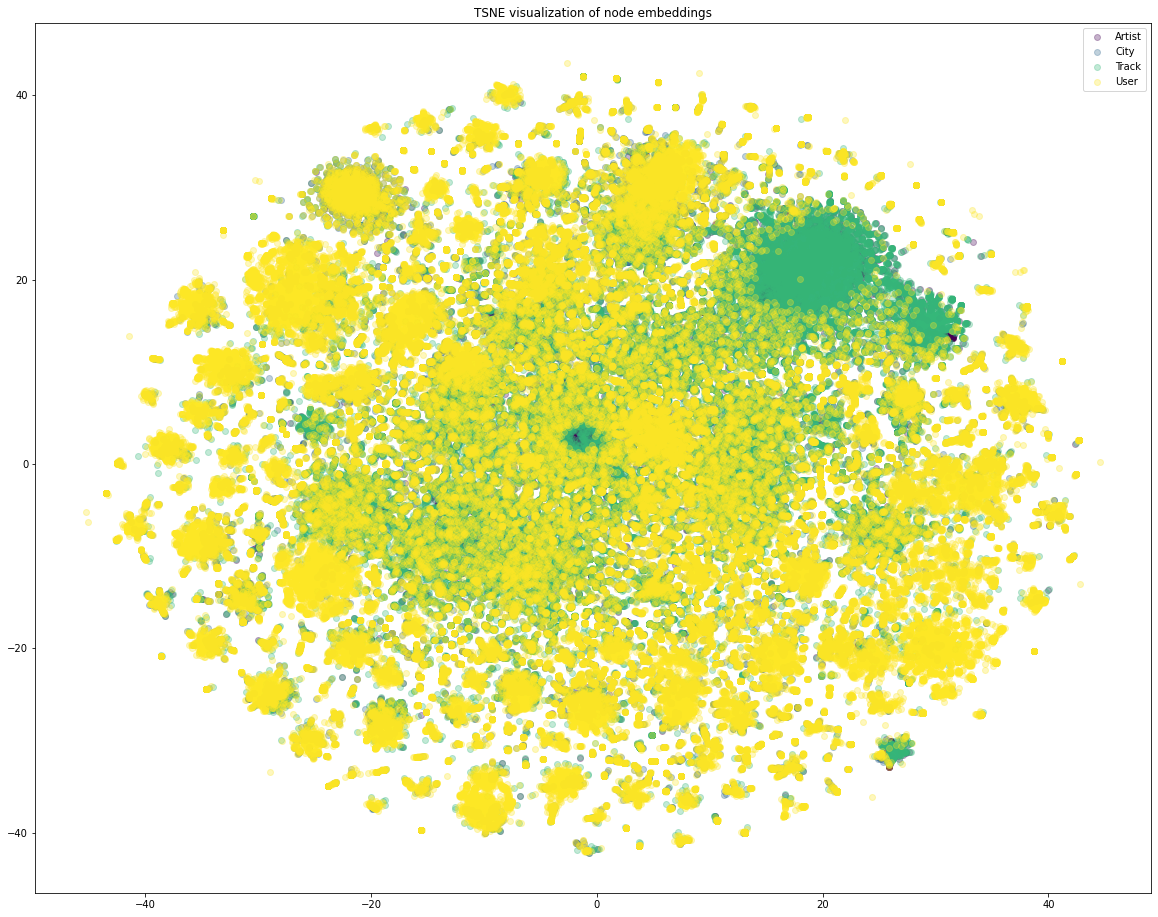

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Create a color map
unique_targets = np.unique(node_targets)
colors = plt.cm.get_cmap('viridis', len(unique_targets))  # You can choose different colormaps
label_map = {label: colors(i) for i, label in enumerate(unique_targets)}
node_colours = [label_map[target] for target in node_targets]

# Plotting
plt.figure(figsize=(20, 16))
for target in unique_targets:
    indices = [i for i, x in enumerate(node_targets) if x == target]
    plt.scatter(node_embeddings_2d[indices, 0], node_embeddings_2d[indices, 1], color=label_map[target], label=target, alpha=0.3)

plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.legend()  # Add a legend
plt.show()

